In [1]:
import numpy as np
import math

from astropy.io import fits
from astropy.units import degree, kpc
from astropy.coordinates import SkyCoord

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = fits.open('../v4.4.0_delta_transmission_RMplate.fits')
len(data)

1162

In [4]:
old_data = fits.open('../cube/delta_transmission_RMplate.fits')
len(old_data)

1247

### Data Model

**PrimaryHDU**

In [5]:
old_data[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

In [6]:
data[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

**BinaryTableHDU**

In [7]:
old_data[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   24 / width of table in bytes                        
NAXIS2  =                 3466 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
TTYPE1  = 'LAMBDA  '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 'Angstrom'           / physical unit of field                         
TTYPE2  = 'DELTA_T '           / label for field   2                            
TFORM2  = 'D       '        

In [8]:
data[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   24 / width of table in bytes                        
NAXIS2  =                 1970 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
TTYPE1  = 'LAMBDA  '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 'Angstrom'           / physical unit of field                         
TTYPE2  = 'DELTA_T '           / label for field   2                            
TFORM2  = 'D       '        

In [9]:
old_data[1].data

FITS_rec([(4506.6,  0.32041982, 4181.91557086),
          (4506.8,  0.32820452, 4182.03612559),
          (4507. ,  0.32227549, 4182.15668033), ...,
          (5199.2, -0.2579269 , 4558.19798216),
          (5199.4, -0.09486843, 4558.29599698),
          (5199.6,  0.06666617, 4558.39398181)],
         dtype=(numpy.record, [('LAMBDA', '>f8'), ('DELTA_T', '>f8'), ('RCOMOV', '>f8')]))

In [10]:
data[1].data

FITS_rec([(4076.80151367,  0.32350647, 3905.09399802),
          (4077.08862305,  0.308439  , 3905.29386896),
          (4077.37597656,  0.27872723, 3905.49390431), ...,
          (4703.06494141,  0.01087888, 4298.49430524),
          (4703.41748047,  0.35212973, 4298.69429937),
          (4703.77001953, -0.84220416, 4298.89422086)],
         dtype=(numpy.record, [('LAMBDA', '>f8'), ('DELTA_T', '>f8'), ('RCOMOV', '>f8')]))

In [11]:
data[1].data['LAMBDA'][:10]

array([4076.80151367, 4077.08862305, 4077.37597656, 4077.66333008,
       4077.95092773, 4078.23828125, 4078.52563477, 4078.81323242,
       4079.10083008, 4079.38818359])

In [27]:
data[1].data['DELTA_T'][:500]

array([ 0.32350647,  0.308439  ,  0.27872723,  0.29058183,  0.30265771,
        0.29285898, -0.95886295, -0.67127763, -0.79292283, -0.36988063,
        0.18720689, -0.71703327, -0.37370286, -0.26765465, -0.11307438,
       -0.99998037, -0.75640395, -1.        , -0.52950062,  0.32855395,
       -0.86440256,  0.27912833,  0.30301377,  0.24863683,  0.28055085,
       -0.11040626, -0.58820189,  0.29917197,  0.26774116,  0.28120009,
        0.27677806,  0.26120094,  0.2730712 , -0.03059963,  0.25078228,
        0.26532634,  0.25018551,  0.2387283 ,  0.19987205,  0.03585945,
        0.18751045,  0.28717977,  0.2867271 ,  0.27296462,  0.23266972,
        0.19562022,  0.09448056, -0.32932675,  0.27926891,  0.27339763,
        0.27395927,  0.38393399, -0.9891798 , -0.9999833 , -0.9882855 ,
       -0.57182982, -0.33518709,  0.28041015, -0.97865839, -1.        ,
       -0.99999968, -1.        , -0.77001723, -0.99999934, -1.        ,
       -1.        , -1.        ,  0.11102331,  0.20750495, -0.77

In [13]:
data[1].data['RCOMOV'][:10]

array([3905.09399802, 3905.29386896, 3905.49390431, 3905.69386064,
       3905.89398686, 3906.09394319, 3906.29389951, 3906.49395504,
       3906.69399668, 3906.8938685 ])

In [14]:
ra_list = []
for i in range(1,len(data)):
    ra_list.append(data[i].header['RA'])
ras = np.array(ra_list)
ras.shape

(1161,)

In [15]:
dec_list = []
for i in range(1,len(data)):
    dec_list.append(data[i].header['DEC'])
decs = np.array(dec_list)
decs.shape

(1161,)

In [16]:
z_list = []
for i in range(1,len(data)):
    z_list.append(data[i].header['Z'])
zs = np.array(z_list)
zs.shape

(1161,)

In [17]:
rcomov_list = []
deltat_list = []
avg_deltat = []
for i in range(1,len(data)):
    rcomov_list.append(data[i].data['RCOMOV'])
    deltat_list.append(data[i].data['DELTA_T'])
    avg_deltat.append(data[i].data['DELTA_T'].mean())

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [18]:
quasar_2d = SkyCoord(ra=ras*degree, dec=decs*degree, distance=zs*kpc, frame='icrs')
quasar_2d.shape

(1161,)

In [19]:
ra = quasar_2d[:].ra.value

In [20]:
dec = quasar_2d[:].dec.value

In [21]:
dis1 = quasar_2d[:].distance.value

In [22]:
rel_dis1 = dis1/dis1.max()

In [23]:
color1 = np.zeros((quasar_2d.shape[0], 4))
color1[:,3] = rel_dis1

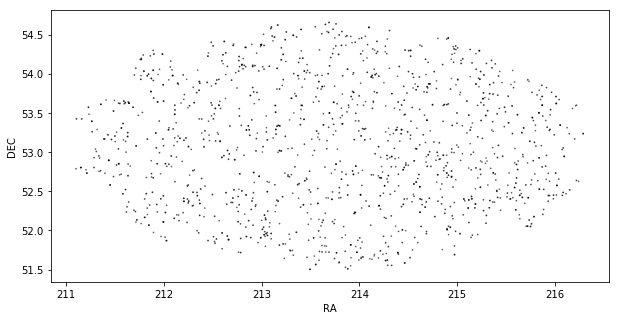

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(ra, dec, s=rel_dis1, c=color1)
# plt.scatter(lon2, lat2, s=0.5, c='k')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()